In [ ]:
!pip install statsmodels --upgrade

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
series=pd.read_excel("/content/gigabyte.xlsx")

In [ ]:
series.head()

,event_time,price_gigabyte
0,2020-10-02,403.46
1,2021-02-12,292.83
2,2021-02-12,292.83
3,2021-02-12,292.83
4,2021-02-28,444.51


In [ ]:
series["event_time"]=pd.to_datetime(series["event_time"])

In [ ]:
new_series=series.groupby("event_time").sum()

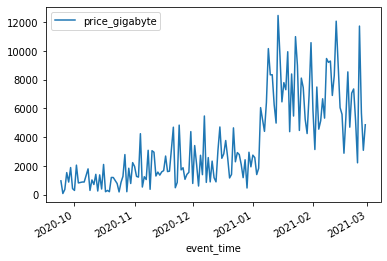

In [ ]:
new_series.plot()

In [ ]:
new_series.isnull().sum()

price_gigabyte    0
dtype: int64

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def adfuller_test(purchase):
    result=adfuller(purchase)
    labels = ['ADF Test Statistic','p-value']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [ ]:
adfuller_test(new_series["price_gigabyte"])

ADF Test Statistic : -1.6751390025021378
p-value : 0.44396497277335056
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
new_series["gig_log"]=np.log(new_series["price_gigabyte"])

In [ ]:
adfuller_test(new_series["gig_log"])

ADF Test Statistic : -1.2176467389360197
p-value : 0.665958838481574
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [ ]:
gig_diff=new_series["price_gigabyte"].diff()

In [ ]:
gig_diff=gig_diff.dropna()

In [ ]:
adfuller_test(gig_diff)

ADF Test Statistic : -13.148636400951023
p-value : 1.3815589744939309e-24
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [ ]:
gig_diff.shape

(154,)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


/usr/local/lib/python3.7/dist-packages/statsmodels/graphics/tsaplots.py:353: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  FutureWarning,


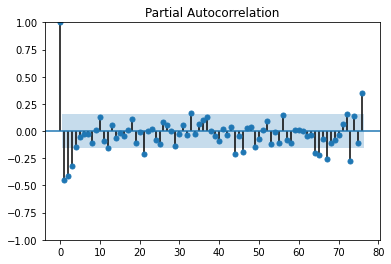

In [ ]:
pacf_plot = plot_pacf(gig_diff,lags=76)


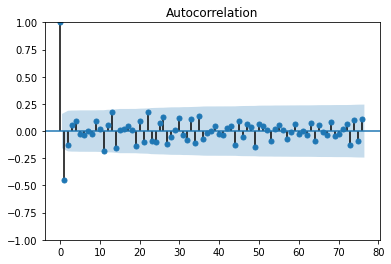

In [ ]:
acf_plot = plot_acf(gig_diff, lags = 76)

In [ ]:
import statsmodels.api as sm


In [ ]:
model1 = sm.tsa.arima.ARIMA(new_series["price_gigabyte"], order=(0,1,1))
result1 = model1.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:         price_gigabyte   No. Observations:                  155
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1378.366
Date:                Tue, 10 May 2022   AIC                           2760.731
Time:                        18:12:11   BIC                           2766.805
Sample:                             0   HQIC                          2763.199
                                - 155                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7640      0.042    -18.186      0.000      -0.846      -0.682
sigma2      3.567e+06   3.17e+05     11.251      0.000    2.95e+06    4.19e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                19.63
Prob(Q):                              0.68   Prob(JB):                         0.00
Heteroskedasticity (H):               8.92   Skew:                             0.56
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast_1=result1.predict(start=123,end=154,dynamic=True)


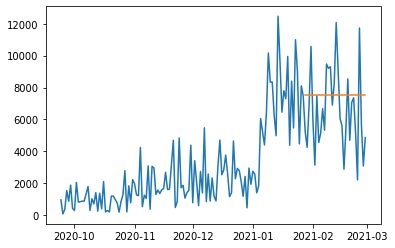

In [ ]:
plt.plot(new_series["price_gigabyte"])
plt.plot(forecast_1)
plt.show()

In [ ]:
model2=sm.tsa.statespace.SARIMAX(new_series["price_gigabyte"],order=(0, 1, 1),seasonal_order=(0,1,2,15))
results2=model2.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [ ]:
results2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                          price_gigabyte   No. Observations:                  155
Model:             SARIMAX(0, 1, 1)x(0, 1, [1, 2], 15)   Log Likelihood               -1254.046
Date:                                 Tue, 10 May 2022   AIC                           2516.093
Time:                                         18:15:08   BIC                           2527.831
Sample:                                              0   HQIC                          2520.863
                                                 - 155                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7494      0.045    -16.724      0.000      -0.837      -0.662
ma.S.L15      -0.9152      0.082    -11.194      0.000      -1.075      -0.755
ma.S.L30       0.2398      0.094      2.546      0.011       0.055       0.424
sigma2      3.881e+06   4.39e+05      8.840      0.000    3.02e+06    4.74e+06
===================================================================================
Ljung-Box (L1) (Q):                   0.39   Jarque-Bera (JB):                 3.46
Prob(Q):                              0.53   Prob(JB):                         0.18
Heteroskedasticity (H):               5.09   Skew:                             0.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.42
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
forecast_2=results2.predict(start=123,end=153,dynamic=True)


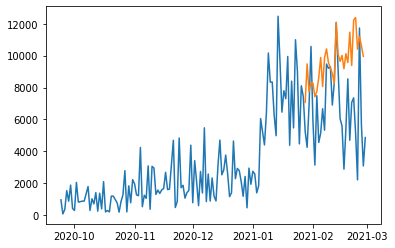

In [ ]:
plt.plot(new_series["price_gigabyte"])
plt.plot(forecast_2)
plt.show()

In [ ]:
y=new_series.price_gigabyte[123:154]

In [ ]:
residuals=forecast_2-y

In [ ]:
residuals

event_time
2021-01-28    1824.886281
2021-01-29    5229.123019
2021-01-30     853.482153
2021-01-31   -2286.218425
2021-02-01    2375.417384
2021-02-02    4282.154646
2021-02-03     266.269563
2021-02-04    4076.601297
2021-02-05    4741.884830
2021-02-06    1388.990809
2021-02-07    4564.911615
2021-02-08     947.245284
2021-02-09     345.944015
2021-02-10     -65.753697
2021-02-11    1967.046083
2021-02-12     -23.167991
2021-02-13      15.315722
2021-02-14     962.571958
2021-02-15    3585.908546
2021-02-16    4422.542305
2021-02-17    6297.007866
2021-02-18    4717.369937
2021-02-19    1025.107489
2021-02-20    6774.463125
2021-02-21    2316.237653
2021-02-22    4876.183433
2021-02-23    7241.965604
2021-02-24    8195.728990
2021-02-25    -528.283823
2021-02-26    4927.866000
2021-02-27    6869.926493
dtype: float64

In [ ]:
forecast_2

event_time
2021-01-28     7067.426281
2021-01-29     9480.573019
2021-01-30     7743.062153
2021-01-31     8289.651575
2021-02-01     8273.317384
2021-02-02     7422.354646
2021-02-03     7755.119563
2021-02-04     8633.201297
2021-02-05     9884.504830
2021-02-06     8060.090809
2021-02-07     9889.881615
2021-02-08    10421.145284
2021-02-09     9552.324015
2021-02-10     9233.576303
2021-02-11     8868.976083
2021-02-12     8264.802009
2021-02-13    12086.785722
2021-02-14    10071.951958
2021-02-15     9643.588546
2021-02-16    10011.812305
2021-02-17     9178.887866
2021-02-18    10121.529937
2021-02-19     9568.067489
2021-02-20    11469.443125
2021-02-21     9381.197653
2021-02-22    12230.273433
2021-02-23    12384.675604
2021-02-24    10410.098990
2021-02-25    11202.976177
2021-02-26    10613.336000
2021-02-27     9955.596493
Name: predicted_mean, dtype: float64

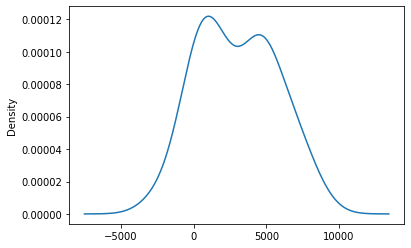

In [ ]:
residuals.plot(kind='kde')
plt.show()

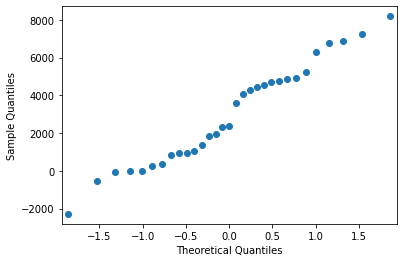

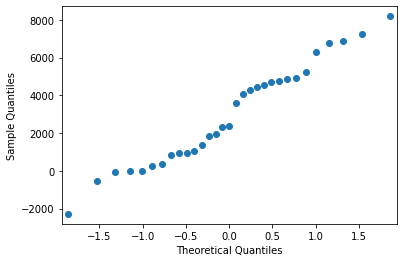

In [ ]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals)

In [ ]:
RSS=sum(residuals**2)

In [ ]:
TSS=new_series["price_gigabyte"]-new_series["price_gigabyte"].mean()

In [ ]:
TSS_Squared=sum(TSS**2)

In [ ]:
RSS

490153945.9151321

In [ ]:
TSS_Squared

1418290971.3995638

In [ ]:
r_squared= 1-(RSS/TSS_Squared)

In [ ]:
r_squared

0.654405227277552

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms = sqrt(mean_squared_error(y, forecast_2))
print(rms)

3433.8073237505023


In [ ]:
from scipy.stats import shapiro

In [ ]:
shapiro(residuals)

(0.9603599905967712, 0.2982250154018402)